In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
from dateutil import tz

In [2]:
#import data
video = pd.read_csv("USvideos.csv")
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [3]:
#cek tipe data
video.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

tipe data yang belum sesuai adalah:
- trending_date -> datetime
- publish_time -> datetime
- category_id -> factor

In [4]:
video['trending_date'] = pd.to_datetime(video['trending_date'], format="%y.%d.%m")
video.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

In [5]:
def convert(timestamp):
    dt = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S.%fZ')
    est = pytz.timezone('US/Eastern')
    dt_est = dt.replace(tzinfo=pytz.utc).astimezone(est)
    return dt_est

# Apply the conversion function to the 'publish_time' column
video['publish_time'] = video['publish_time'].apply(convert)

# Extract day name from the converted datetime object
video['publish_hour'] = video['publish_time'].apply(lambda dt: dt.strftime('%H'))

# Print the updated DataFrame
video

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 12:13:01-05:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,12
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 02:30:00-05:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",02
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 14:05:24-05:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 06:00:04-05:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,06
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 13:01:41-05:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 09:00:04-04:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,09
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-17 21:00:06-04:00,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,21
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 13:34:22-04:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,13
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 13:00:04-04:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,13


In [6]:
#cari ada berapa jumlah kategori
kode_category = video['category_id'].unique()
kode_category

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [7]:
#ubah category_id menjadi tipe data category
video['category_id'] = video['category_id'].astype('category')

In [8]:
#agar lebih informatif, kode angka pada category_id diubah menjadi deskripsi
video['category_id'] = video['category_id'].cat.rename_categories({1 : "Film and Animation",
        2 : "Autos and Vehicles",
        10 : "Music",
        15 : "Pets and Animals",
        17 : "Sports",
        19 : "Travel and Events",
        20 : "Gaming",
        22 : "People and Blogs",
        23 : "Comedy",
        24 : "Entertainment",
        25 : "News and Politics",
        26 : "Howto and Style",
        27 : "Education",
        28 : "Science and Technology",
        29 : "Nonprofit and Activism",
        43 : "Shows"})

In [9]:
video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People and Blogs,2017-11-13 12:13:01-05:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,12
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13 02:30:00-05:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",02
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12 14:05:24-05:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13 06:00:04-05:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,06
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12 13:01:41-05:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,13


In [10]:
video['like_ratio'] = video ['likes'] / video ['views']
video['dislike_ratio'] = video['dislikes'] / video['views']
video['comment_ratio'] = video['comment_count'] / video['views']
video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_hour,like_ratio,dislike_ratio,comment_ratio
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People and Blogs,2017-11-13 12:13:01-05:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,12,0.076869,0.003963,0.021318
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13 02:30:00-05:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",02,0.040179,0.002541,0.005252
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12 14:05:24-05:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14,0.045758,0.001673,0.002563
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13 06:00:04-05:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,06,0.029641,0.001941,0.006253
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12 13:01:41-05:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,13,0.063097,0.000949,0.008359


In [11]:
video.dtypes

video_id                                      object
trending_date                         datetime64[ns]
title                                         object
channel_title                                 object
category_id                                 category
publish_time              datetime64[ns, US/Eastern]
tags                                          object
views                                          int64
likes                                          int64
dislikes                                       int64
comment_count                                  int64
thumbnail_link                                object
comments_disabled                               bool
ratings_disabled                                bool
video_error_or_removed                          bool
description                                   object
publish_hour                                  object
like_ratio                                   float64
dislike_ratio                                f

In [12]:
video["publish_day"] = video['publish_time'].dt.day_name()
video['publish_hour'] = video['publish_time'].dt.hour
video["trending_year"] = video['trending_date'].dt.year
video["trending_month"] = video['trending_date'].dt.month_name()
video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,publish_hour,like_ratio,dislike_ratio,comment_ratio,publish_day,trending_year,trending_month
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People and Blogs,2017-11-13 12:13:01-05:00,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,12,0.076869,0.003963,0.021318,Monday,2017,November
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13 02:30:00-05:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,"One year after the presidential election, John...",2,0.040179,0.002541,0.005252,Monday,2017,November
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12 14:05:24-05:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14,0.045758,0.001673,0.002563,Sunday,2017,November
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13 06:00:04-05:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,Today we find out if Link is a Nickelback amat...,6,0.029641,0.001941,0.006253,Monday,2017,November
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12 13:01:41-05:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,I know it's been a while since we did this sho...,13,0.063097,0.000949,0.008359,Sunday,2017,November


In [13]:
video['category_id'].unique()

['People and Blogs', 'Entertainment', 'Comedy', 'Science and Technology', 'Film and Animation', ..., 'Autos and Vehicles', 'Travel and Events', 'Gaming', 'Nonprofit and Activism', 'Shows']
Length: 16
Categories (16, object): ['Film and Animation', 'Autos and Vehicles', 'Music', 'Pets and Animals', ..., 'Education', 'Science and Technology', 'Nonprofit and Activism', 'Shows']

In [14]:
video['title'].nunique()

6455

In [15]:
video_unique = video.groupby('title').first().reset_index()
video_unique

,title,video_id,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,publish_hour,like_ratio,dislike_ratio,comment_ratio,publish_day,trending_year,trending_month
0,#184 Making a PCB using EasyEDA. // Review,BPmgDhwbd1w,2017-12-07,MickMake,Science and Technology,2017-12-02 09:05:07-05:00,"MickMake|""electronics""|""embedded""|""maker""|""diy...",3237,161,2,...,False,False,"If you're at the point of making your own PCB,...",9,0.049737,0.000618,0.010812,Saturday,2017,December
1,"#23 Feed The Homeless | One List, One Life",4qakFfGRV4E,2017-12-01,"One List , One Life",People and Blogs,2017-11-30 10:36:12-05:00,"homeless|""experiment""|""people""|""man""|""singing""...",32385,568,77,...,False,False,Learn more about us: https://mybestfriendslist...,10,0.017539,0.002378,0.002995,Thursday,2017,December
2,#57: AM and SSB explained,l7n58h-Zj3I,2018-01-04,Radio Physics and Electronics,Science and Technology,2017-12-24 14:15:29-05:00,"AM|""SSB""|""amplitude modulation""|""single sideba...",3287,79,3,...,False,False,In this video we explore some of the simple ma...,14,0.024034,0.000913,0.005780,Sunday,2018,January
3,"#AboveTheNoise feat. Serena Williams, Neymar J...",oWithLP0VlQ,2017-11-29,Beats by Dre,Music,2017-11-22 12:23:20-05:00,[none],2152261,7824,158,...,False,False,"In a loud world full of distractions, it's nev...",12,0.003635,0.000073,0.000151,Wednesday,2017,November
4,#DisneyParksLIVE: Fantasy In The Sky New Years...,FQp6F0PjfpI,2018-01-06,Disney Parks,Entertainment,2018-01-01 00:11:37-05:00,"Fantasy In The Sky New Years Eve Fireworks|""Di...",130416,1812,30,...,False,False,Disney,0,0.013894,0.000230,0.000843,Monday,2018,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,힐링쿠킹♥ 빙글빙글 회오리젤리 만들기! - Ari Kitchen(아리키친),ghNoCu0QiH4,2018-02-04,ARIKITCHEN (아리키친),People and Blogs,2018-02-02 20:09:48-05:00,"아리키친|""arikitchen""|""아리키친 젤리""|""회오리젤리""|""jello rol...",250007,7854,133,...,False,False,해외에서 아이들 간식으로 인기가 후끈후끈~ 회오리젤리♥\n오감만족 힐링쿠킹이에요 ~...,20,0.031415,0.000532,0.010248,Friday,2018,February
6451,"🍒 april favs 🍒 (music, clothes, life)",IUsFWiE0d20,2018-04-25,Conan Gray,People and Blogs,2018-04-22 12:00:01-04:00,"conanxcanon|""joeygraceffa""|""connor""|""franta""|""...",128633,17483,42,...,False,False,Big thanks to Audible for sponsoring~ Get a FR...,12,0.135914,0.000327,0.014514,Sunday,2018,April
6452,🍫달콤 쌉사름~ 리얼 초콜릿 우유 만들기 Real Chocolate Milk | 한세,CNBGEWRdeIM,2018-02-10,HANSE 한세,Howto and Style,2018-02-09 05:36:13-05:00,"CookingASMR|""FoodASMR""|""베이킹""|""ASMR""|""ZOOMH6""|""...",84325,4467,21,...,False,False,▽ 영상 아래 더보기 클릭 ! ('구독'과 '좋아요' 감사합니다 ☺)\n영상에서 쓰...,5,0.052974,0.000249,0.006831,Friday,2018,February
6453,🎃 How to make Pumpkin Pie Mistakes,bAfn2duIlN8,2017-11-22,iJustine,People and Blogs,2017-11-21 14:39:43-05:00,"ijustine|""how to make pumpkin pie""|""pumpkin pi...",76859,4895,164,...,False,False,Making pumpkin pie.. or at least trying my bes...,14,0.063688,0.002134,0.009342,Tuesday,2017,November


In [16]:
#top 10 trending channel selama tahun 2017 - 2018
video_trending = pd.crosstab(
    index = video_unique ['channel_title'],
    columns = 'frequency',
    aggfunc = 'count',
    values = video_unique ['channel_title']
)
top_10_video_trending = video_trending.sort_values('frequency', ascending = False)[:10]
top_10_video_trending

col_0,frequency
channel_title,
ESPN,84
TheEllenShow,74
The Tonight Show Starring Jimmy Fallon,72
Jimmy Kimmel Live,70
Netflix,58
The Late Show with Stephen Colbert,58
NBA,54
CNN,52
Vox,48


<AxesSubplot:xlabel='channel_title'>

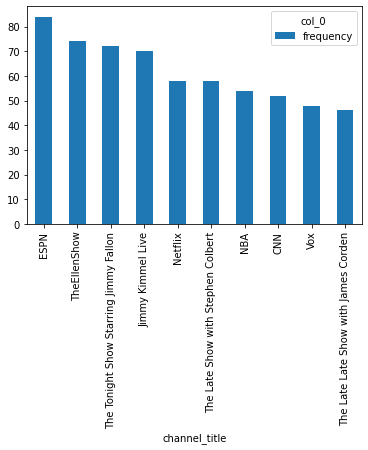

In [17]:
top_10_video_trending.plot.bar()

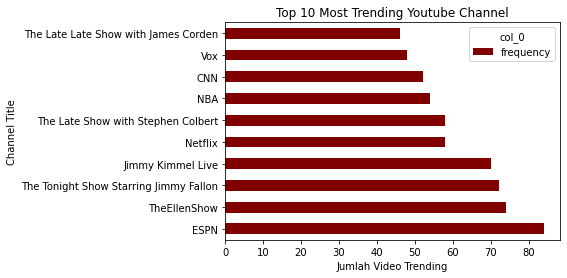

In [18]:
top_10_video_trending.plot.barh(color = "maroon")
plt.xlabel("Jumlah Video Trending")
plt.ylabel("Channel Title")
plt.title("Top 10 Most Trending Youtube Channel")
plt.show()

In [19]:
reversed_values = top_10_video_trending[::-1]
reversed_values

col_0,frequency
channel_title,
The Late Late Show with James Corden,46
Vox,48
CNN,52
NBA,54
The Late Show with Stephen Colbert,58
Netflix,58
Jimmy Kimmel Live,70
The Tonight Show Starring Jimmy Fallon,72
TheEllenShow,74


In [20]:
top = video_unique.groupby('channel_title').count()[['title']].sort_values('title', ascending = False)
top10 = top[:10]
top10

,title
channel_title,
ESPN,84
TheEllenShow,74
The Tonight Show Starring Jimmy Fallon,72
Jimmy Kimmel Live,70
Netflix,58
The Late Show with Stephen Colbert,58
NBA,54
CNN,52
Vox,48


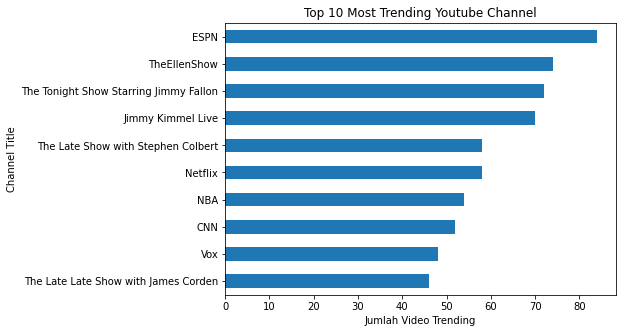

In [21]:
top = video_unique.groupby('channel_title')['title'].count()
top10 = top.nlargest(10)
plt.figure(figsize=(7, 5
                   )) 
top10.sort_values().plot(kind="barh")
plt.xlabel("Jumlah Video Trending")
plt.ylabel("Channel Title")
plt.title("Top 10 Most Trending Youtube Channel")
plt.show()

In [22]:
#Apa korelasi antara likes ratio dan dislikes ratio dari kategory entertainment, music, comedy? 
video_emc = video_unique[(video_unique['category_id'] == 'Entertainment')| (video_unique['category_id'] == 'Music') |(video_unique['category_id'] == 'Comedy')]
video_emc

,title,video_id,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,publish_hour,like_ratio,dislike_ratio,comment_ratio,publish_day,trending_year,trending_month
3,"#AboveTheNoise feat. Serena Williams, Neymar J...",oWithLP0VlQ,2017-11-29,Beats by Dre,Music,2017-11-22 12:23:20-05:00,[none],2152261,7824,158,...,False,False,"In a loud world full of distractions, it's nev...",12,0.003635,0.000073,0.000151,Wednesday,2017,November
4,#DisneyParksLIVE: Fantasy In The Sky New Years...,FQp6F0PjfpI,2018-01-06,Disney Parks,Entertainment,2018-01-01 00:11:37-05:00,"Fantasy In The Sky New Years Eve Fireworks|""Di...",130416,1812,30,...,False,False,Disney,0,0.013894,0.000230,0.000843,Monday,2018,January
7,#GuacWorld :60 | 2018 Big Game Commercial | Av...,ijVLdH5dt-c,2018-02-03,Avocados From Mexico,Entertainment,2018-01-31 09:30:24-05:00,"Avocados from Mexico|""food""|""avocado""|""avocado...",21278,54,5,...,False,False,A perfect society unravels when they realize t...,9,0.002538,0.000235,0.000188,Wednesday,2018,February
8,#HurtBae 2: One Year Later - Kourtney and Leon...,gmp6AGFPhzY,2018-02-25,Iris,Entertainment,2018-02-22 09:59:59-05:00,"hurt bae|""hurtbae""|""hurt bae 2""|""hurtbae 2""|""h...",676024,17953,897,...,False,False,"Kourtney and Leonard are exes. One year ago, t...",9,0.026557,0.001327,0.009967,Thursday,2018,February
9,#LightTheWorld Christmas Concert with The Pian...,t7Fa1GUf-LE,2017-12-16,ThePianoGuys,Music,2017-12-12 18:39:56-05:00,"ThePianoGuys|""The Piano Guys""|""Secrets""|""David...",196922,8223,128,...,False,False,#LightTheWorld is a worldwide effort to share ...,18,0.041758,0.000650,0.002250,Tuesday,2017,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,“Santa Baby” ft. Ciara | TARAJI’S WHITE HOT HO...,iCXQwI2Luw8,2017-12-16,Empire,Entertainment,2017-12-12 14:26:50-05:00,"Taraji White Hot Holiday|""Empire""|""Christmas""|...",22659,585,8,...,False,False,"A new spin on the saucy holiday song, Santa Ba...",14,0.025818,0.000353,0.001412,Tuesday,2017,December
6433,€20 IN PARIS vs $20 IN NY,YpnV0M6XTc8,2018-01-17,DamonAndJo,Comedy,2018-01-16 13:09:06-05:00,"paris|""new york""|""nyc""|""manhattan""|""expensive""...",63544,5120,87,...,False,False,In two of the most expensive cities in the wor...,13,0.080574,0.001369,0.006610,Tuesday,2018,January
6443,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",MAjY8mCTXWk,2018-05-15,杰威爾音樂 JVR Music,Music,2018-05-14 11:59:47-04:00,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128,40485,1042,...,False,False,詞：周杰倫、宋健彰（彈頭） 曲：周杰倫憂鬱型男的走心旋律 用英式搖滾宣洩情傷不愛我就拉倒...,11,0.044191,0.001137,0.005180,Monday,2018,May
6444,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",MAjY8mCTXWk,2018-06-11,杰威爾音樂 JVR Music,Music,2018-05-14 11:59:47-04:00,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",21957640,140214,10716,...,False,False,MV點閱率破華語歌曲紀錄，首日點閱突破200萬，三週已狂飆2000萬！不僅在華語地區蟬聯發燒...,11,0.006386,0.000488,0.000702,Monday,2018,June


In [23]:
colors = []
size = []
for lab, row in video_emc.iterrows():
    category = row['category_id']
    if category == "Entertainment":
        colors.append('red')
    elif category == "Music":
        colors.append('lightgreen')
    else:
        colors.append('blue')

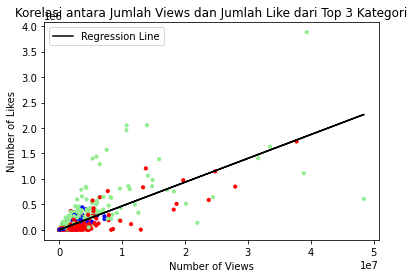

In [24]:
plt.scatter(video_emc['views'], video_emc['likes'], c=colors, s=10)

slope, intercept = np.polyfit(video_emc['views'], video_emc['likes'], 1)
regression_line = np.polyval([slope, intercept], video_emc['views'])

plt.plot(video_emc['views'], regression_line, color='black', label='Regression Line')
plt.xlabel('Number of Views')
plt.ylabel('Number of Likes')
plt.title('Korelasi antara Jumlah Views dan Jumlah Like dari Top 3 Kategori')
plt.legend()
plt.show()

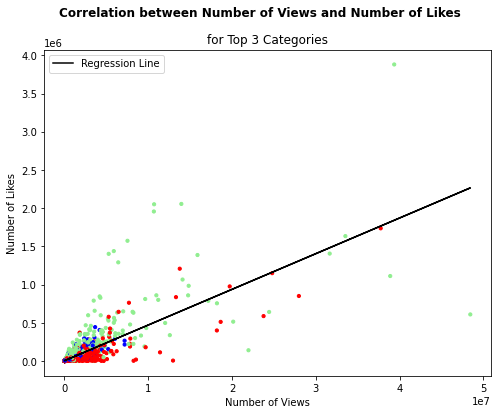

In [25]:
# Scatter plot
plt.figure(figsize=(8, 6))  # Set the height (8 inches) and width (6 inches)
plt.scatter(video_emc['views'], video_emc['likes'], c=colors, s=10)

# Regression line
slope, intercept = np.polyfit(video_emc['views'], video_emc['likes'], 1)
regression_line = np.polyval([slope, intercept], video_emc['views'])
plt.plot(video_emc['views'], regression_line, color='black', label='Regression Line')

# Labels and title
plt.xlabel('Number of Views')
plt.ylabel('Number of Likes')
plt.title('for Top 3 Categories')

# Subtitle
plt.suptitle('Correlation between Number of Views and Number of Likes', fontsize=12, fontweight='bold')

plt.legend()

# Display the plot
plt.show()

In [26]:
np.corrcoef(video_emc['views'], video_emc['likes'])[0,1]

0.7612176114146563

In [27]:
video_category = video_unique.groupby('category_id').sum()[['likes', 'dislikes']]
video_category

,likes,dislikes
category_id,,
Film and Animation,9732051,297893
Autos and Vehicles,450771,26418
Music,84951031,2089063
Pets and Animals,1601343,30704
Sports,8978759,475434
Travel and Events,369265,20412
Gaming,5144936,379852
People and Blogs,16166150,851517
Comedy,21540535,575264


In [28]:
series = video_category.stack()
series = series.unstack(level=1)
print(series)

                           likes  dislikes
category_id                               
Film and Animation       9732051    297893
Autos and Vehicles        450771     26418
Music                   84951031   2089063
Pets and Animals         1601343     30704
Sports                   8978759    475434
Travel and Events         369265     20412
Gaming                   5144936    379852
People and Blogs        16166150    851517
Comedy                  21540535    575264
Entertainment           44617015   3042062
News and Politics        1987997    486728
Howto and Style         14336431    366130
Education                4068287    113799
Science and Technology   6954446    304011
Nonprofit and Activism   1554070    212425
Shows                      47145      1017


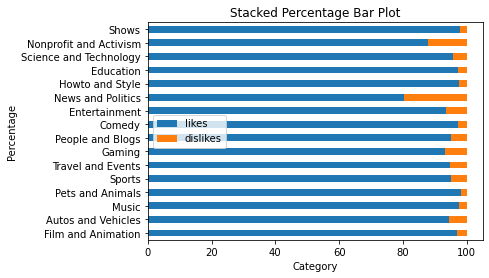

In [29]:
# Example Series
series = video_category.stack()
series = series.unstack(level=1)

# Calculate the total sum for each category
total_sum = series.sum(axis=1)

# Calculate the percentage for each category
percentages = series.divide(total_sum, axis=0) * 100

# Create the stacked percentage bar plot
ax = percentages.plot.barh(stacked=True)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Stacked Percentage Bar Plot')

# Display the legend
plt.legend()

# Show the plot
plt.show()

<Figure size 1008x720 with 0 Axes>

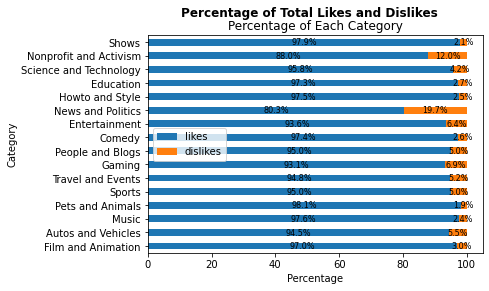

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Example Series
series = video_category.stack()
series = series.unstack(level=1)

# Calculate the total sum for each category
total_sum = series.sum(axis=1)

# Calculate the percentage for each category
percentages = series.divide(total_sum, axis=0) * 100

# Create the stacked percentage bar plot
plt.figure(figsize=(14, 10))  # Set the size of the figure (width=10, height=6)
ax = percentages.plot.barh(stacked=True)

# Add percentage text on each category
for i, (name, values) in enumerate(percentages.iterrows()):
    x = values.cumsum().values  # x-position for percentage text
    y = i  # y-position for percentage text
    for j, val in enumerate(values):
        ax.text(x[j] - val / 2, y, f'{val:.1f}%', ha='center', va='center', fontsize=8)

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Category')
plt.title('Percentage of Each Category')

plt.suptitle('Percentage of Total Likes and Dislikes', fontsize=12, fontweight='bold')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [31]:
top = video_unique.groupby('channel_title').count()[['title']].sort_values('title', ascending = False)
top10 = top[:10]
top10

,title
channel_title,
ESPN,84
TheEllenShow,74
The Tonight Show Starring Jimmy Fallon,72
Jimmy Kimmel Live,70
Netflix,58
The Late Show with Stephen Colbert,58
NBA,54
CNN,52
Vox,48


In [32]:
category_df = video_unique[['channel_title', 'category_id']].drop_duplicates()
category_df

,channel_title,category_id
0,MickMake,Science and Technology
1,"One List , One Life",People and Blogs
2,Radio Physics and Electronics,Science and Technology
3,Beats by Dre,Music
4,Disney Parks,Entertainment
...,...,...
6447,HANSE 한세,Howto and Style
6448,SBS TV동물농장x애니멀봐,Pets and Animals
6449,영국남자 Korean Englishman,Comedy
6450,ARIKITCHEN (아리키친),People and Blogs


In [33]:
top10_with_category = pd.merge(top10, category_df, on='channel_title', how='left')
top10_with_category

,channel_title,title,category_id
0,ESPN,84,Sports
1,TheEllenShow,74,Entertainment
2,The Tonight Show Starring Jimmy Fallon,72,Comedy
3,Jimmy Kimmel Live,70,Entertainment
4,Jimmy Kimmel Live,70,Comedy
5,Netflix,58,Entertainment
6,The Late Show with Stephen Colbert,58,Entertainment
7,The Late Show with Stephen Colbert,58,People and Blogs
8,NBA,54,Sports
9,CNN,52,News and Politics


In [34]:
column_name = {'channel_title': 'Channel Title',
               'title':'Number of Videos that were Trending',
               'category_id':'Category'}
top10_with_category = top10_with_category.rename(columns=column_name)
top10_with_category

,Channel Title,Number of Videos that were Trending,Category
0,ESPN,84,Sports
1,TheEllenShow,74,Entertainment
2,The Tonight Show Starring Jimmy Fallon,72,Comedy
3,Jimmy Kimmel Live,70,Entertainment
4,Jimmy Kimmel Live,70,Comedy
5,Netflix,58,Entertainment
6,The Late Show with Stephen Colbert,58,Entertainment
7,The Late Show with Stephen Colbert,58,People and Blogs
8,NBA,54,Sports
9,CNN,52,News and Politics


In [35]:
day = video_unique.groupby('publish_day')['title'].count()
day

publish_day
Friday       1039
Monday        956
Saturday      541
Sunday        677
Thursday     1056
Tuesday      1103
Wednesday    1083
Name: title, dtype: int64

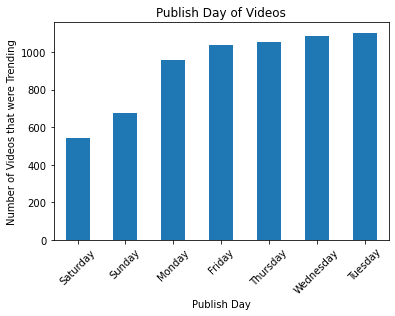

In [36]:
day = video_unique.groupby('publish_day')['title'].count()
day.sort_values().plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Publish Day")
plt.ylabel("Number of Videos that were Trending")
plt.title("Publish Day of Videos")
plt.show()

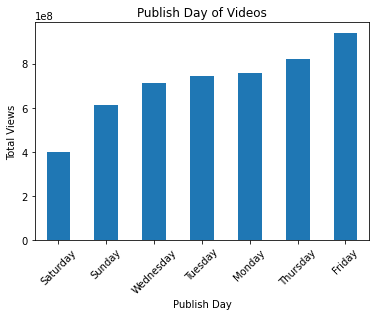

In [37]:
day_trending = video_unique.groupby('publish_day')['views'].sum()
day_trending.sort_values().plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Publish Day")
plt.ylabel("Total Views")
plt.title("Publish Day of Videos")
plt.show()

In [38]:
#perkembangan views dari top 3 kategori (entertainment, music, comedy) berdasarkan trending datenya di tahun 2018
video_2018 = video_unique [video_unique['trending_year'] == 2018]
video_2018_category = video_2018 [(video_2018['category_id'] == 'Entertainment') | (video_2018['category_id'] == 'Music')|(video_2018['category_id'] == 'Comedy')]
video_2018_category['category_id'] = video_2018_category['category_id'].astype(str)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21084\3144806643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_2018_category['category_id'] = video_2018_category['category_id'].astype(str)


In [39]:
video_2018_month = video_2018_category.groupby(['trending_month', 'category_id']).sum()[['views']]
video_2018_month

views
trending_month category_id             
April          Comedy          52848039
               Entertainment  243158734
               Music          231006900
February       Comedy          41947908
               Entertainment  148825369
               Music           68097262
January        Comedy          61606669
               Entertainment  139429222
               Music          125481492
June           Comedy          15182960
               Entertainment   83991895
               Music           62414310
March          Comedy          55155340
               Entertainment  177913199
               Music          164878118
May            Comedy          63261878
               Entertainment  206632796
               Music          240319729

In [40]:
series = video_2018_month.stack()
series = series.unstack(level=1)
month_order = ['January', 'February', 'March', 'April', 'June']
series = series.sort_values(by='trending_month', key=lambda x: pd.Categorical(x, categories=month_order))
print(series)

category_id             Comedy  Entertainment      Music
trending_month                                          
January        views  61606669      139429222  125481492
February       views  41947908      148825369   68097262
March          views  55155340      177913199  164878118
April          views  52848039      243158734  231006900
June           views  15182960       83991895   62414310
May            views  63261878      206632796  240319729


<Figure size 720x432 with 0 Axes>

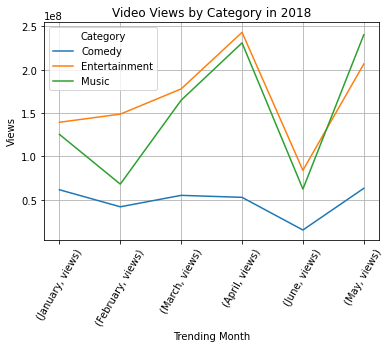

In [41]:
plt.figure(figsize=(10, 6)) 
series.plot(kind='line', rot = 60)
plt.xlabel('Trending Month')
plt.ylabel('Views')
plt.title('Video Views by Category in 2018')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [42]:
video_2017 = video_unique [video_unique['trending_year'] == 2017]
video_2017_category = video_2017 [(video_2017['category_id'] == 'Entertainment') | (video_2017['category_id'] == 'Music')|(video_2017['category_id'] == 'Comedy')]
video_2017_category['category_id'] = video_2017_category['category_id'].astype(str)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21084\509206582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_2017_category['category_id'] = video_2017_category['category_id'].astype(str)


In [43]:
video_2017_month = video_2017_category.groupby(['trending_month', 'category_id']).sum()[['views']]
video_2017_month.reset_index(inplace=True)  # Reset index for proper stacking
video_2017_month

,trending_month,category_id,views
0,December,Comedy,76725656
1,December,Entertainment,207941027
2,December,Music,148363387
3,November,Comedy,60064346
4,November,Entertainment,151478882
5,November,Music,168375147


In [44]:
month_order = ['November', 'December']  # Updated month orde
# Correct the month name from 'Desember' to 'December'
video_2017_month['trending_month'] = video_2017_month['trending_month'].replace('Desember', 'December')

In [45]:
series2 = video_2017_month.set_index(['trending_month', 'category_id']).unstack(level=1)
series2.columns = series2.columns.droplevel()  # Drop the 'views' level from column names
series2 = series2.reindex(month_order)  # Reindex to enforce month order

<Figure size 720x432 with 0 Axes>

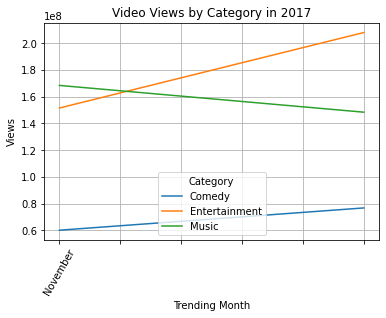

In [46]:
plt.figure(figsize=(10, 6))
series2.plot(rot=60)
plt.xlabel('Trending Month')
plt.ylabel('Views')
plt.title('Video Views by Category in 2017')
plt.legend(title='Category')
plt.grid(True)
plt.show()

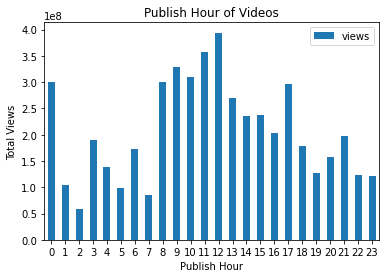

In [47]:
video_hour = video_unique.groupby('publish_hour').sum()[['views']]
video_hour.plot(kind = "bar", rot = 360)
plt.xlabel('Publish Hour')
plt.ylabel('Total Views')
plt.title('Publish Hour of Videos')
plt.show()